citations:
emojifier deep learning.ai

In [1]:
import pandas as pd
import math
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
def read_glove_vecs(glove_file):
    with open(glove_file, 'r',encoding='UTF-8') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [3]:
dfDataDump = pd.read_csv('/home/archit/Desktop/ad_vs_organic/final_combined_organic_duration3.csv')

In [4]:
dfDataDump.shape

(120876, 35)

In [5]:
dfDataDump.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories', 'cleanDescriptions'],
      dtype='object')

In [14]:
dfLen = dfDataDump['cleanDescriptions'].apply(lambda x: len(x))

In [34]:
np.max(dfLen)

Len                      4715.000000
Frequency               28452.000000
Frequency Percentage       23.538171
dtype: float64

ValueError: max must be larger than min in range parameter.

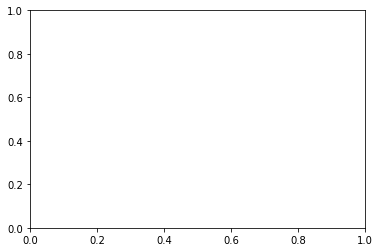

In [40]:
#bins =int((dfLen['Len'].max() - dfLen['Len'].min())/200)
gh = plt.hist(dfLen['Frequency'], bins = 10)
plt.ylabel('Number of videos')
plt.xlabel('error')
plt.title('Frequiency table of diff in freq count')
plt.show()

In [41]:
freq = freq.astype('int64')
dfLen = pd.DataFrame()
dfLen['Len'] = pd.Series(error)
dfLen['Frequency'] = pd.Series(freq)
dfLen['Frequency Percentage'] = dfLen['Frequency']/ dfLen['Frequency'].sum() * 100
dfLen

,Len,Frequency,Frequency Percentage
0,19.000000,3680.0,3.044442
1,223.173913,23113.0,19.121248
2,427.347826,28452.0,23.538171
3,631.521739,17768.0,14.699361
4,835.695652,23729.0,19.630861
5,1039.869565,12757.0,10.553791
6,1244.043478,6243.0,5.164797
7,1448.217391,2371.0,1.961514
8,1652.391304,1123.0,0.929051
9,1856.565217,501.0,0.414474


In [33]:
dfLen.describe()

,Len,Frequency,Frequency Percentage
count,24.000000,23.000000,23.000000
mean,2367.000000,5255.478261,4.347826
std,1443.727585,9070.010694,7.503566
min,19.000000,7.000000,0.005791
25%,1193.000000,49.500000,0.040951
50%,2367.000000,242.000000,0.200205
75%,3541.000000,4961.500000,4.104620
max,4715.000000,28452.000000,23.538171


In [12]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dfDataDump['cleanDescriptions']=dfDataDump['TestData'].map(lambda s:preprocess(s)) 

In [16]:
dfDataDump.drop('TestData', axis=1, inplace=True)

In [17]:
dfDataDump.columns

Index(['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories', 'cleanDescriptions'],
      dtype='object')

In [18]:
dfDataDump.to_csv('/home/archit/Desktop/ad_vs_organic/final_combined_organic_duration3.csv', index =False)

Next we will set up our input dataset and define the function for model training

In [5]:
def input_dataset(dfData, views =0, categories =[], country= ['IN']):
    """manipulates input dataframe according to input parameters.
    Args:
        dfData: input dataset
        views: minimum number of views in dfData.Default = 0.
        categories: list of categories to be present in final dataset.Default is empty list(all categories)
        country: List of countries whose videos should be present in dataSet. Default is India.
    Returns:
        dataset to train model on
    """
    # slice dataset with viewCount larger than views
    dfData = dfData[dfData['viewCount'] >= views]
    # concat dfData according to categories
    categoryIds =(dfData['categoryId'].dropna().unique()).tolist()
    # create temporary df
    tempDf = pd.DataFrame(columns = ['vid', 'channelId', 'duration', 'licensedContent', 'definition',
       'dislikeCount', 'commentCount', 'favoriteCount', 'viewCount',
       'likeCount', 'relevantTopicIds', 'topicIds', 'topicCategories', 'title',
       'description', 'tags', 'categoryId', 'channelTitle', 'publishedAt',
       'Channel Title', 'Channel Description', 'Channel Publish date',
       ' Channel hiddenSubscriberCount', 'Channel viewCount',
       'Channel subscriberCount', 'Channel commentCount', 'Channel videoCount',
       'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'])
    for categoryId in categoryIds:
        df = dfData[dfData['categoryId'] == categoryId]
        keys = []
        keys[0], keys[1] = tempDf['categoryId'][0], df['categoryId'][0]
        tempf = pd.concat([tempDf, df], ignore_index = True, keys = keys)
        
    # select dataframe according to categories
    if len(categories) != 0:
        dfData = tempDf.loc[categories]
    else:
        dfData = tempDf
    
    # choosing countries
    if len(country) != 0:
            dfData = dfData.loc[dfData['Channel country'] == country, ]
    else:
        dfData = dfData.loc[dfData['Channel country'] == 'IN']
        
    return dfData

In [6]:
def preprocessing(dfData):
    """drops irrelevant features, merges adStats and previous video stats
    Args:
    dfData: input DataSet
    Return:
    merged DataSet
    """
    # drop irrelevant features
    dfData = dfData.drop(['licensedContent', 'relevantTopicIds', 'topicIds', 'topicCategories', 'channelTitle', 'Channel Title', 'Channel Description', ' Channel hiddenSubscriberCount', 'Channel showRelatedChannels', 'Channel featuredChannelsUrls',
       'Channel noOfFeaturedChannels', 'Channel country', 'Channel keywords',
       'Channel topicIds', 'Channel topicCategories'], axis = 1)
    
    # load advertisement and previous stats dataset and clean
    dfAdStats = pd.read_csv('/home/archit/Desktop/ad_vs_organic/resultstats.csv').drop(['ch_id','Unnamed: 0'], axis =1)
    dfAdStats.rename(columns = {'video_id':'vid'}, inplace = True)
    dfPrevStats = pd.read_csv('/home/archit/Desktop/ad_vs_organic/previousVideoStats2.csv').drop(['Unnamed: 0'], axis =1)
    dfPrevStats.rename(columns = {'Id':'vid'}, inplace = True)

    # merge DataSet
    dfMergedData = dfData.merge(dfPrevStats, on = 'vid', how = 'left')
    dfMergedData = dfMergedData.merge(dfAdStats, on = 'vid', how = 'left')
    return dfMergedData

In [7]:
def feature_engineer(dfData):
    dfData =dfData.drop(['favoriteCount', 'PrevTitle', 'PrevPublishedAt', 'Channel commentCount', 'categoryId', 'cleanDescriptions'],axis =1)
    dfData['is_english'] = dfData['Lang'].apply(lambda x: 1 if x=='en' else 0)
    dfData = dfData.drop('Lang', axis=1)
    
    
    dfData['PublishedYear'] = dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['Channel Publish date'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['Channel viewCount'])
    dfData['LikeDislikeRatio'] = dfData['likeCount']/(dfData['dislikeCount'] + dfData['likeCount'])
    dfData['PrevCommentCount'] = dfData['PrevCommentCount'].fillna(0)
    dfData['PrevDislikeCount'] = dfData['PrevDislikeCount'].fillna(0)
    dfData['PrevLikeCount'] = dfData['PrevLikeCount'].fillna(0)
    dfData['PrevViewCount'] = dfData['PrevViewCount'].fillna(0)   
    dfData['duration'] = dfData['duration'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['Channel subscriberCount'] = dfData['Channel subscriberCount'].fillna(0)
    dfData['Definition'] = dfData['definition'].apply(lambda x: 1 if x=='hd' else 0)
    dfData = dfData.drop(['title','description','publishedAt','Channel viewCount','Channel Publish date','channelId','tags', 'ad%'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

In [9]:
dfData = preprocessing(dfDataDump)
dfData.head()

,vid,channelId,duration,definition,dislikeCount,commentCount,favoriteCount,viewCount,likeCount,title,...,Channel videoCount,Lang,cleanDescriptions,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,ad%
0,HGUPOfgKZak,UC05HXt0G85Q2RFNWP7oArYw,57.0,hd,0.0,10.0,0.0,884.0,98.0,Jamming with Darshan Raval at RadioMirchi (Ye ...,...,22.0,en,darshanraval subscribe press bell icon videos ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,j290K0z88o4,UC05HXt0G85Q2RFNWP7oArYw,237.0,hd,2.0,7.0,0.0,487.0,40.0,Ed Sheeran - Shape Of You (Indian Version) | H...,...,22.0,en,completely revived indian version billboard ch...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Wyha0AHJMCY,UC05HXt0G85Q2RFNWP7oArYw,217.0,hd,0.0,1.0,0.0,263.0,15.0,Pukarata Chala Hun Main | Live Rendition by Ac...,...,22.0,en,live rendition evergreen melody pukarta chala ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,IZEoofMLF0Q,UC05HXt0G85Q2RFNWP7oArYw,99.0,hd,2.0,3.0,0.0,203.0,18.0,Mann Bharrya | Unplugged | AcousticRishabh | B...,...,22.0,en,unplugged cover mann bharreya originally sung ...,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,tIfNeR7J_nQ,UC05HXt0G85Q2RFNWP7oArYw,194.0,hd,4.0,5.0,0.0,1306.0,42.0,Lag Jaa Gale | Live & Unplugged | Rishabh Tiwari,...,22.0,en,original song credits song lag jaa gale singer...,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [11]:
dfTrainingData = dfData[dfData['ad%'] == 0]
dfValidationData = dfData[dfData['ad%'] > 0]

In [13]:
dfValidationData.to_csv("/home/archit/Desktop/ad_vs_organic/validationDataEng.csv", index=False)

In [14]:
df = feature_engineer(dfTrainingData)

In [15]:
df.columns

Index(['vid', 'duration', 'definition', 'dislikeCount', 'commentCount',
       'viewCount', 'likeCount', 'Channel subscriberCount',
       'Channel videoCount', 'PrevCommentCount', 'PrevDislikeCount',
       'PrevLikeCount', 'PrevViewCount', 'is_english', 'PublishedYear',
       'ChannelAge', 'channelViewCount', 'LikeDislikeRatio', 'Definition'],
      dtype='object')

In [16]:
X, y = df.drop('viewCount',axis = 1) , np.log(df['viewCount'])
X.shape

(56671, 18)

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

runnning stuff of LSTM

In [10]:
# select dfData with english language
#dfData = dfData[dfData['Lang'] == 'en'].reset_index()

In [18]:
def getVal(dictionary):
    """get value of single element dictionary
    """
    for key, val in dictionary.items():
        return val

In [19]:
descriptions = []
videos = list(train_X.vid)
for vid in videos:
    Dict = dfDataDump.loc[dfDataDump['vid'] == vid, 'cleanDescriptions'].to_dict()
    descriptions.append(getVal(Dict))

In [20]:
descriptions = pd.Series(descriptions)

In [21]:
length = pd.Series([len(description.split()) for description in descriptions])
maxLen = length.max()

In [22]:
maxLen

628

descriptions = pd.read_csv('/home/archit/Desktop/ad vs organic/decriptions.csv')
decriptions.columns

# preprocess descriptions for glove embedding
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


dfData['cleanDescriptions']=dfData['description'].map(lambda s:preprocess(s)) 

In [24]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('/home/archit/Desktop/ad_vs_organic/glove.6B.50d.txt')

In [25]:
word = "the"
index = 289846
print("the index of", word, "in the vocabulary is", word_to_index[word])
print("the", str(index) + "th word in the vocabulary is", index_to_word[index])

the index of the in the vocabulary is 357266
the 289846th word in the vocabulary is potatos


### Scaling data for applying before to neural nets

In [26]:
def linear_scale(series):
  min_val = series.min()
  max_val = series.max()
  scale = (max_val - min_val) / 2.0
  return series.apply(lambda x:((x - min_val) / scale) - 1.0)

In [27]:
def log_normalize(series):
  return series.apply(lambda x:math.log(x+1.0))

def clip(series, clip_to_min, clip_to_max):
  return series.apply(lambda x:(
    min(max(x, clip_to_min), clip_to_max)))

def z_score_normalize(series):
  mean = series.mean()
  std_dv = series.std()
  return series.apply(lambda x:(x - mean) / std_dv)

def binary_threshold(series, threshold):
  return series.apply(lambda x:(1 if x > threshold else 0))

In [28]:
def normalize_linear_scale(examples_dataframe):
  """Returns a version of the input `DataFrame` that has all its features normalized linearly."""
  processed_features = pd.DataFrame()
  processed_features["duration"] = log_normalize(examples_dataframe["duration"])
  processed_features["dislikeCount"] = log_normalize(examples_dataframe["dislikeCount"])
  processed_features["commentCount"] = log_normalize(examples_dataframe["commentCount"])
  processed_features["likeCount"] = log_normalize(examples_dataframe["likeCount"])
  processed_features["Channel subscriberCount"] = linear_scale(examples_dataframe["Channel subscriberCount"])
  processed_features["Channel videoCount"] = linear_scale(examples_dataframe["Channel videoCount"])
  processed_features["PrevCommentCount"] = log_normalize(examples_dataframe["PrevCommentCount"])
  processed_features["PrevDislikeCount"] = log_normalize(examples_dataframe["PrevDislikeCount"])
  processed_features["PrevViewCount"] = log_normalize(examples_dataframe["PrevViewCount"])
  processed_features["LikeDislikeRatio"] = linear_scale(examples_dataframe["LikeDislikeRatio"])
  processed_features["channelViewCount"] = log_normalize(examples_dataframe["channelViewCount"])

    
  return processed_features

normalized_dataframe = normalize_linear_scale(train_X)

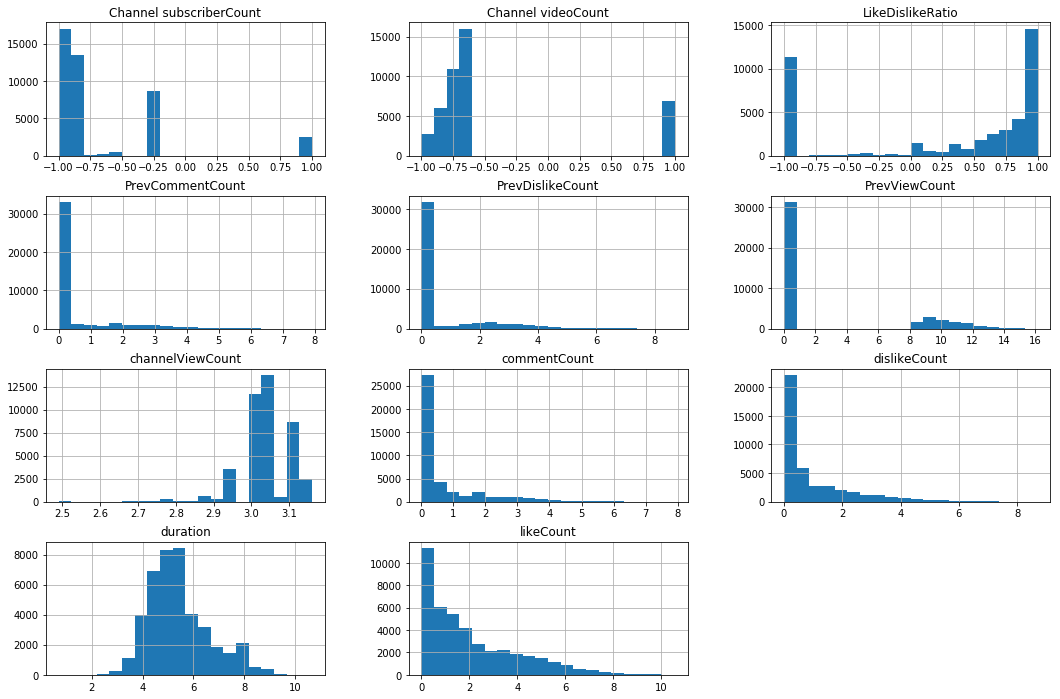

In [29]:
_ = normalized_dataframe.hist(bins=20, figsize=(18, 12), xlabelsize=10)

In [40]:
import numpy as np
np.random.seed(0)
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.optimizers import Adam
from keras.layers import concatenate
from keras.callbacks import ModelCheckpoint

np.random.seed(1)

In [31]:
# sentences_to_indices

def sentences_to_indices(X, word_to_index, max_len):
    """
    Converts an array of sentences (strings) into an array of indices corresponding to words in the sentences.
    The output shape should be such that it can be given to `Embedding()` (described in Figure 4). 
    
    Arguments:
    X -- array of sentences (strings), of shape (m, 1)
    word_to_index -- a dictionary containing the each word mapped to its index
    max_len -- maximum number of words in a sentence. You can assume every sentence in X is no longer than this. 
    
    Returns:
    X_indices -- array of indices corresponding to words in the sentences from X, of shape (m, max_len)
    """
    
    m = X.shape[0]                                   # number of training examples
    
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    
    for i in range(m):                               # loop over training examples
        
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = [w.lower() for w in X[i].split()]
        
        # Initialize j to 0
        j = 0
        
        # Loop over the words of sentence_words
        for w in sentence_words:
            # Set the (i,j)th entry of X_indices to the index of the correct word.
            try:
                X_indices[i, j] = word_to_index[w]
            except:
                X_indices[i, j] = word_to_index['the']
            # Increment j to j + 1
            j += 1
            
    
    return X_indices

In [32]:
X1 = np.array(["funny lol", "lets play baseball", "food is ready for you"])
X1_indices = sentences_to_indices(X1,word_to_index, max_len = 5)
print("X1 =", X1)
print("X1_indices =", X1_indices)

X1 = ['funny lol' 'lets play baseball' 'food is ready for you']
X1_indices = [[155345. 225122.      0.      0.      0.]
 [220930. 286375.  69714.      0.      0.]
 [151204. 192973. 302254. 151349. 394475.]]


In [33]:
# pretrained_embedding_layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    # Initialize the embedding matrix as a numpy array of zeros of shape (vocab_len, dimensions of word vectors = emb_dim)
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    # Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
    for word, index in word_to_index.items():
        emb_matrix[index, :] = word_to_vec_map[word]

    # Define Keras embedding layer with the correct output/input sizes, make it trainable. Use Embedding(...). Make sure to set trainable=False. 
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False)

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [34]:
embedding_layer = pretrained_embedding_layer(word_to_vec_map, word_to_index)
print("weights[0][1][3] =", embedding_layer.get_weights()[0][1][3])

Instructions for updating:
Colocations handled automatically by placer.
weights[0][1][3] = -0.3403


In [36]:
model = PREDICT_USING_TEXT_V2((maxLen,), word_to_vec_map, word_to_index)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 703)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 703, 50)      20000050    main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 703, 128)     91648       embedding_2[0][0]                
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 703, 128)     0           lstm_1[0][0]                

In [37]:
# optimizer for regression stacking
adam = Adam(lr=0.0002, decay = 0.00001)

In [38]:
model.compile(loss='mean_squared_error', optimizer=adam)

In [89]:
#train_X.drop('definition', axis=1, inplace=True)

In [38]:
train_X.columns

Index(['duration', 'dislikeCount', 'commentCount', 'likeCount',
       'Channel subscriberCount', 'Channel videoCount', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount', 'is_english',
       'PublishedYear', 'ChannelAge', 'channelViewCount', 'LikeDislikeRatio',
       'Definition'],
      dtype='object')

In [37]:
train_X.drop(['definition', 'vid'], axis=1, inplace=True)

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
X_train_indices = sentences_to_indices(descriptions.values, word_to_index, 703)

In [44]:
resume_model = load_model("/home/archit/Desktop/ad_vs_organic/LStM/weights-improvement-01-3.68.hdf5")
filepath="/home/archit/Desktop/ad_vs_organic/LStM/weights-improvement-{epoch:02d}-{loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]
resume_model.fit({'main_input':X_train_indices, 'auxiliary_input': train_X}, {'main_output': train_y}, epochs = 50, batch_size = 32, callbacks=callbacks_list, shuffle=True)

Epoch 1/50
 4512/42503 [==>...........................] - ETA: 51:00 - loss: 4.0527

KeyboardInterrupt: 

In [ ]:
model.load_weights("/home/archit/Desktop/ad_vs_organic/LStM/weights-improvement-01-3.68.hdf5")

In [47]:
dfVal = feature_engineer(dfValidationData)

In [60]:
dfValidationData.columns

Index(['vid', 'channelId', 'duration', 'definition', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'title',
       'description', 'tags', 'categoryId', 'publishedAt',
       'Channel Publish date', 'Channel viewCount', 'Channel subscriberCount',
       'Channel commentCount', 'Channel videoCount', 'Lang',
       'cleanDescriptions', 'PrevCommentCount', 'PrevDislikeCount',
       'PrevLikeCount', 'PrevPublishedAt', 'PrevViewCount', 'PrevTitle',
       'ad%'],
      dtype='object')

In [48]:
X_, y = dfVal.drop('viewCount',axis = 1) , np.log(dfVal['viewCount'])


In [49]:
descriptions2 = []
videos = list(X_.vid)
for vid in videos:
    Dict = dfDataDump.loc[dfDataDump['vid'] == vid, 'cleanDescriptions'].to_dict()
    descriptions2.append(getVal(Dict))

In [50]:
descriptions2 = pd.Series(descriptions2)

In [51]:
X_.drop(['definition', 'vid'], axis=1, inplace=True)

In [53]:
X_train_indices2 = sentences_to_indices(descriptions2.values, word_to_index, 703)

In [55]:
result = resume_model.predict({'main_input':X_train_indices2, 'auxiliary_input': X_})

In [58]:
result[0:5]

array([[7.1692953],
       [7.089959 ],
       [7.320867 ],
       [7.1694145],
       [6.950097 ]], dtype=float32)

In [63]:
# function exponentiates values in test_y and pred and
# than calulated rmse of actual views
import math
size = y.shape[0]
test_yL = dfValidationData['viewCount'].tolist()
predL = result.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
for i in range(0, size):
    exActView.append((test_yL[i]))
    exPredView.append(math.exp(predL[i][0]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))

rmse = math.sqrt(sum(sqErr) /size)/(max(exActView) - min(exActView))
dfEval = pd.DataFrame({'vid': dfValidationData['vid'], 'Actual' : exActView, 'Pred': exPredView, 'Diff': diff, 'ad%':dfValidationData['ad%']})
dfEval.head()

,Actual,Diff,Pred,ad%,vid
5,394.0,-904.928939,1298.928939,33.421053,jCnNgHTdbYY
6,254.0,-945.858779,1199.858779,0.406504,iR_gXXK0Q_Q
11,4478.0,2966.486022,1511.513978,70.752984,fIPFc687ink
12,2233.0,933.916207,1299.083793,0.136488,8bLDlaRfp9c
20,54352.0,53308.748994,1043.251006,0.001860,gYd1wqGqZnk


In [64]:
dfEval['Predicted Ad %'] = (dfEval['Diff'])/dfEval['Actual']*100
dfEval.head()

,Actual,Diff,Pred,ad%,vid,Predicted Ad %
5,394.0,-904.928939,1298.928939,33.421053,jCnNgHTdbYY,-229.677396
6,254.0,-945.858779,1199.858779,0.406504,iR_gXXK0Q_Q,-372.385346
11,4478.0,2966.486022,1511.513978,70.752984,fIPFc687ink,66.245780
12,2233.0,933.916207,1299.083793,0.136488,8bLDlaRfp9c,41.823386
20,54352.0,53308.748994,1043.251006,0.001860,gYd1wqGqZnk,98.080566


In [65]:
dfEval[dfEval['Predicted Ad %']<0]=0
dfEval.head()

,Actual,Diff,Pred,ad%,vid,Predicted Ad %
5,0.0,0.000000,0.000000,0.000000,0,0.000000
6,0.0,0.000000,0.000000,0.000000,0,0.000000
11,4478.0,2966.486022,1511.513978,70.752984,fIPFc687ink,66.245780
12,2233.0,933.916207,1299.083793,0.136488,8bLDlaRfp9c,41.823386
20,54352.0,53308.748994,1043.251006,0.001860,gYd1wqGqZnk,98.080566


In [ ]:
# save the model
from keras.models import load_model
model.save('/home/archit/Desktop/ad vs organic/ad_vs_organic_keras_model.h5')

Now we will use standard metrics and evaluate our result

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [67]:
r2_score(dfEval['ad%'],dfEval['Predicted Ad %'])

-164.78591121628605

In [70]:
np.sqrt(mean_squared_error(dfEval['ad%'],dfEval['Predicted Ad %']))

84.83562740807251

In [72]:
mean_absolute_error(dfEval['ad%'],dfEval['Predicted Ad %'])

79.3856331210703

In [ ]:
bins =int( (dfEval['Diff'].max() - dfEval['Diff'].min())/5)
gh = plt.hist(dfEval['Diff'], bins = bins)
freq, error = gh[0], gh[1]
plt.ylabel('Number of videos')
plt.xlabel('error')
plt.title('Frequiency table of diff in ad%')
plt.show()

In [ ]:
freq = freq.astype('int64')
dfErr = pd.DataFrame()
dfErr['Error'] = pd.Series(error)
dfErr['Frequency'] = pd.Series(freq)
dfErr['Frequency Percentage'] = dfErr['Frequency']/ dfErr['Frequency'].sum() * 100
dfErr

Now we will look for videos with error in prediction > 30 and figure out why.

In [ ]:
dfErr[np.abs(dfErr['Error'])>30]

In [29]:
# Loading ad stats dataset
dfAdStats = pd.read_csv('/home/archit/Desktop/ad vs organic/resultstats.csv')
dfAdStats2 = dfAdStats.drop(['ch_id','Unnamed: 0'], axis =1)
dfAdStats2.rename(columns = {'video_id':'vid'}, inplace = True)
dfAdStats2.shape

(246184, 2)

In [41]:
# Loading perv stats dataset
dfPrevStats = pd.read_csv('/home/archit/Desktop/ad vs organic/previousVideoStats2.csv')
dfPrevStats = dfPrevStats.drop(['Unnamed: 0'], axis =1)
dfPrevStats.rename(columns = {'Id':'vid'}, inplace = True)

dfPrevStats.head()

,PrevCommentCount,PrevDislikeCount,PrevLikeCount,PrevPublishedAt,PrevViewCount,PrevTitle,vid
0,9.0,5.0,112.0,2016-08-25T03:48:52.000Z,21007.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 13 - Hà...,NaN
1,7.0,6.0,77.0,2016-11-15T06:59:55.000Z,19326.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 14 - Kh...,LPqCSwCNI5w
2,28.0,12.0,109.0,2016-11-15T07:01:46.000Z,33071.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 17 - Gi...,0LGl5jbnrlU
3,8.0,9.0,84.0,2016-11-15T07:01:55.000Z,29516.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 18 - C...,jFFSYwdku9M
4,12.0,18.0,145.0,2016-11-15T07:02:03.000Z,49653.0,Nhỏ To Cùng Mẹ | Nhật Ký Bí Bầu | Tuần 19 - Ăn...,HvFNGb-nrRU


### Merging Dataset

In [42]:
dfMergedData = dfData2.merge(dfPrevStats, on = 'vid', how = 'left')
dfMergedData = dfMergedData.merge(dfAdStats2, on = 'vid', how = 'left')

In [43]:
dfMergedData.columns

Index(['Unnamed: 0', 'vid', 'channelId', 'duration', 'dislikeCount',
       'commentCount', 'favoriteCount', 'viewCount', 'likeCount', 'title',
       'description', 'tags', 'categoryId', 'publishedAt',
       'Channel Publish date', 'Channel viewCount', 'Channel subscriberCount',
       'Channel commentCount', 'Channel videoCount', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevPublishedAt', 'PrevViewCount',
       'PrevTitle', 'ad%'],
      dtype='object')

In [44]:
dfMergedData.to_csv("/home/archit/Desktop/ad vs organic/merged_data_ad_vs_org.csv")

In [45]:
dfMergedData = pd.read_csv('/home/archit/Desktop/ad vs organic/merged_data_ad_vs_org.csv')

### Picking up traininig set and validation set

In [46]:
dfTrainingSet = dfMergedData.loc[dfMergedData['ad%'] == 0,]
dfTrainingSet.shape

(112873, 27)

In [47]:
dfValidationSet = dfMergedData.loc[dfMergedData['ad%']>0, ]

dfValidationSet.shape

(8003, 27)

dfTrainingSet.to_csv("/home/archit/Desktop/ad vs organic/training_data_ad_vs_org3.csv")


In [48]:
dfValidationSet['orgViews'] = dfValidationSet['viewCount']*(100-dfValidationSet['ad%'])

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
dfValidationSet.drop('viewCount', axis=1, inplace= True)
dfValidationSet.rename(columns = {'orgViews':'viewCount'}, inplace = True)

/home/archit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/archit/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [23]:
dfTrainingSet = pd.concat([dfTrainingSet, dfValidationSet], ignore_index = True)

In [24]:
dfTrainingSet.shape

(36515, 26)

In [25]:
dfValidationSet.to_csv('/home/archit/Desktop/ad vs organic/validation_data_ad_vs_org3.csv')

### Feature engineering


In [50]:
def feature_engineer(dfData):
    dfData =dfData.drop(['favoriteCount', 'PrevTitle', 'PrevPublishedAt', 'Channel commentCount', 'categoryId'],axis =1)
    
    
    dfData['PublishedYear'] = dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['Channel Publish date'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['Channel viewCount'])
    dfData['LikeDislikeRatio'] = dfData['likeCount']/(dfData['dislikeCount'] + dfData['likeCount'])
    dfData['PrevCommentCount'] = dfData['PrevCommentCount'].fillna(0)
    dfData['PrevDislikeCount'] = dfData['PrevDislikeCount'].fillna(0)
    dfData['PrevLikeCount'] = dfData['PrevLikeCount'].fillna(0)
    dfData['PrevViewCount'] = dfData['PrevViewCount'].fillna(0)   
    dfData['duration'] = dfData['duration'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].fillna(0)
    dfData['Channel subscriberCount'] = dfData['Channel subscriberCount'].fillna(0)
    dfData = dfData.drop(['title','description','publishedAt','Channel viewCount','Channel Publish date','channelId','tags', 'ad%'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

In [51]:
def feature_engineer2(dfData):
    dfData =dfData.drop(['favoriteCount', 'PrevTitle', 'PrevPublishedAt', 'Channel commentCount'],axis =1)
    
    dfData = dfData.dropna()
    dfData['PublishedYear'] = dfData['publishedAt'].apply(lambda x: x[:4])
    dfData['ChannelAge'] =  dfData['Channel Publish date'].apply(lambda x: x[:4])
    dfData['channelViewCount'] = np.log(dfData['Channel viewCount'])
    dfData['LikeDislikeRatio'] = dfData['likeCount']/(dfData['dislikeCount'] + dfData['likeCount'])
    dfData['LikeDislikeRatio'] = dfData['LikeDislikeRatio'].replace(np.inf, np.nan)
    dfData = dfData.drop(['title','description','publishedAt','','Channel Publish date','channelId','tags', 'ad%'],axis = 1)
    
    return dfData

def drop_obvious_features(dfData):
    dfData = dfData.drop(['LikeCount','DislikeCount','CommentCount'],axis = 1)
    return dfData

In [52]:
df = feature_engineer(dfTrainingSet)
#df.to_csv('/home/archit/Desktop/ad vs organic/trainSet2.csv')

In [61]:
X, y = df.drop('viewCount',axis = 1) , np.log(df['viewCount'])
X = X.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
X.shape

ValueError: labels ['Unnamed: 0' 'Unnamed: 0.1'] not contained in axis

In [69]:
X.columns

Index(['vid', 'duration', 'dislikeCount', 'commentCount', 'likeCount',
       'Channel subscriberCount', 'Channel videoCount', 'PrevCommentCount',
       'PrevDislikeCount', 'PrevLikeCount', 'PrevViewCount', 'PublishedYear',
       'ChannelAge', 'channelViewCount', 'LikeDislikeRatio'],
      dtype='object')

In [55]:
#X.to_csv('/home/archit/Desktop/ad vs organic/trainSET.csv')

### Modeling

In [70]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor

In [71]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

train_X_id, train_X = train_X.vid, train_X.drop('vid', axis = 1)
test_X_id, test_X = test_X.vid, test_X.drop('vid', axis = 1)

reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)

import pickle
pickle.dump(reg, open("Gbr005.pickle.dat", "wb"))

In [72]:
pred = reg.predict(test_X)

In [73]:
size = test_y.shape[0]
test_yL = test_y.tolist()
predL = pred.tolist()
exActView = []
exPredView = []
diff = []
sqErr = []
mape={}
for i in range(0, size):
    exActView.append(math.exp(test_yL[i]))
    exPredView.append(math.exp(predL[i]))
    diff.append(exActView[i] - exPredView[i])
    sqErr.append(math.pow(diff[i], 2))
rmse = math.sqrt(sum(sqErr) /size)/ (test_y.max() - test_y.min())
dfEval = pd.DataFrame({'Id':test_X_id, 'Actual' : exActView, 'Pred': exPredView, 'Diff': diff})
dfEval.head()

,Actual,Diff,Id,Pred
44138,411.0,101.860164,lhpiPhfw8m8,309.139836
31600,881.0,-105.292991,2DEfSW3e3Hg,986.292991
27166,533.0,-201.823546,ZlBuyx8qz64,734.823546
67319,3926.0,1070.292623,fM38i1eHr98,2855.707377
42187,385.0,200.500859,_R4DWeJhz7Y,184.499141


In [74]:
print("Rmse of the regressormodel is:" + str(rmse))

Rmse of the regressormodel is:2387.4454790550158


In [75]:
1011.0650776175543/dfEval['Actual'].mean()

0.04029664809978987

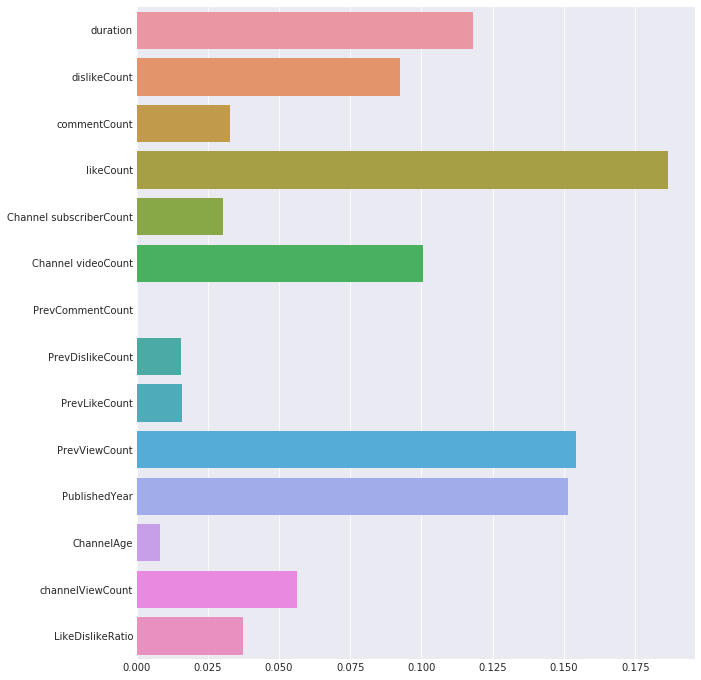

In [76]:
X = X.drop('vid', axis = 1)
sns.set_style('darkgrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

### Modeling on validation set

In [91]:
df = feature_engineer(dfValidationSet)